<a href="https://colab.research.google.com/github/rohithreddy999/Advance_predictive/blob/main/CNN_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks in Python with Keras

- Introduction to Convolutional Neural Network (CNN)
- Layers in CNN
- Understanding the data
- Preprocessing the data
- Constructing the CNN
- Overfitting and how to overcome it through dropout layers
- Predictions on data
- Visualizing the classification report

## Introduction: Convolutional Neural Network (CNN)

CNNs specifically are inspired by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field. This idea was expanded by a captivating experiment done by Hubel and Wiesel in 1962 (if you want to know more, here's a video). In this experiment, the researchers showed that some individual neurons in the brain activated or fired only in the presence of edges of a particular orientation like vertical or horizontal edges. For example, some neurons fired when exposed to vertical sides and some when shown a horizontal edge. Hubel and Wiesel found that all of these neurons were well ordered in a columnar fashion and that together they were able to produce visual perception. This idea of specialized components inside of a system having specific tasks is one that machines use as well and one that you can also find back in CNNs.

CNNs are very similar to regular Neural Networks (NN): they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply.

So what changes?

Revisting NN: Neural Networks receive an input as a single vector, and transform it through a series of hidden layers. Each hidden layer is made up of a set of neurons, where each neuron is fully connected to all neurons in the previous layer, and where neurons in a single layer function completely independently and do not share any connections. The last fully-connected layer is called the “output layer” and in classification settings it represents the class scores.

Regular NNs don’t scale well to full images. If a colored image of size 32x32x3 (32 wide, 32 high, 3 color channels) is fed to NN, then a single fully-connected neuron in a first hidden layer of a regular NN would have 32*32*3 = 3072 weights. This amount still seems manageable, but clearly this fully-connected structure does not scale to larger images. For example, an image of more respectable size, e.g. 200x200x3, would lead to neurons that have 200*200*3 = 120,000 weights. Moreover, we would almost certainly want to have several such neurons, so the parameters would add up quickly! Clearly, this full connectivity is wasteful and the huge number of parameters would quickly lead to overfitting.

Again, if we don't want to feed the whole image to NN, then we have to manually extract the features of the image and then feed the feature vector to NN.

![nn.jpeg](attachment:nn.jpeg)

CNN deals with these drawbacks of regular NN. It removes the human dependency for feature extraction. CNNs make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network. CNNs take advantage of the fact that the input consists of images and they constrain the architecture in a more sensible way. In particular, unlike a regular NN, the layers of a CNN have neurons arranged in 3 dimensions: width, height, depth. In CNN, the neurons in a layer will only be connected to a small region of the layer before it, instead of all of the neurons in a fully-connected manner. Here is a visualization:

![cnn1.jpeg](attachment:cnn1.jpeg)

## Layers in CNN

So, you know that you'll be working with feed-forward networks that are inspired by the biological visual cortex, but what does that actually mean?

Take a look at the picture below:
![cnn2.png](attachment:cnn2.png)

The image shows you that you feed an image as an input to the network, which goes through multiple convolutions, subsampling, a fully connected layer and finally outputs something.

But what are all these layers and what are the concepts behind them?

### Convolution Layer

The Convolution layer or the Conv layer is the core building block of a CNN that does most of the computational heavy lifting. The convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. Each computation leads to extraction of a feature map from the input image. In other words, imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window or kernel around the image. At each position of that matrix, you multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. As a result, you'll get a single number that represents all the values in that window of the images. You use this layer to filtering: as the window moves over the image, you check for patterns in that section of the image. This works because of filters, which are multiplied by the values outputted by the convolution.

Conv layer is made up of various kernels or filters. Each filter is dedicated to identifying some aspect of the image, say a filter detects vertical edges in the image while another filter detects diagonal edges and so on. A kernel or filter is a small grid of numbers and you pass it over your whole image i.e. all the pixels in your input image, and transforming it based on what those numbers are. By using different numbers in the kernels, you can perform different types of image preprocessing (during image recognition) such as contrast, blur, sharpen, or edge detection. Generally speaking, the kernel is smaller than the image, and 3x3 is a pretty common choice!

![kernel.gif](attachment:kernel.gif)

**Hyperparameters of Convolution Layer**

*Padding*: When a kernel reaches the edge of the image, it has to make some decision about what to do where there are no pixels present in the input image. For now, we are going forward with zero-padding the edges, achieved using padding = 'same'. Zero padding means providing a cushion of zeroes outside of the image (as seen in the image above). This helps to ensure the dimensionality of the input image isn’t reduced after the convolution operation.

*Stride*: It indicates how many pixels the kernel should be shifted over at a time. As stride is decreased, more features are learned because more data is extracted, which also leads to larger output layers. On the contrary, as stride is increased, this leads to more limited feature extraction and smaller output layer dimensions. Here, we are using the default stride of (1,1) i.e. the kernel slides over the image in raster scan manner 1 pixel horizontally as well as 1 pixel vertically.

### Pooling Layer (Subsampling)

The objective of subsampling is to get an input representation by reducing its dimensions, which helps in reducing overfitting. One of the techniques of subsampling is max pooling. With this technique, you select the highest pixel value from a region depending on its size. In other words, max pooling takes the largest value from the window of the image currently covered by the kernel. For example, you can have a max-pooling layer of size 2 x 2 will select the maximum pixel intensity value from 2 x 2 region.

![maxpool.png](attachment:maxpool.png)

## The Fashion-MNIST Data Set

[Fashion-MNIST](https://arxiv.org/abs/1708.07747) is a Novel Image Dataset for Benchmarking Machine Learning Algorithms. It consists of 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

There are 10 classes in this dataset:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

You can find the Fashion-MNIST dataset [here](https://github.com/zalandoresearch/fashion-mnist), but you can also load it with the help of specific TensorFlow and Keras modules.

### Loading the data

Keras comes with a library called datasets, which you can use to load datasets. You download the data from the server and speeds up the process since you no longer have to download the data to your computer. The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y, respectively.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 3s 1us/step


Now you're completely set to start analyzing, processing and modeling your data!

### Analyzing the data

Let's now analyze how images in the dataset look like. Even though you know the dimension of the images by now, it's still worth the effort to analyze it programmatically: you might have to rescale the image pixels and resize the images.

In [ ]:
import numpy as np

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, you can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

Now, let's find the number of classes in the dataset.

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


So, there are a total of ten output classes that range from 0 to 9.

Now, take a look at the images in the dataset:

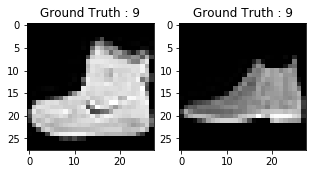

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray');
plt.title("Ground Truth : {}".format(train_Y[0]));

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray');
plt.title("Ground Truth : {}".format(test_Y[0]));

The output of above two plots looks like a boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 boot images will have a class label of 9.

### Data Preprocessing

As you could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28 (2D image). But the layers in CNN accepts the image as 3D. As a result, you'll need to preprocess the data before you feed it into the model.

- As a first step, convert each 28 x 28 2D image of the train and test set into a 3D matrix of size 28 x 28 x 1 which is fed into the network i.e. we are converting the 2D images into 3D images.

In [ ]:
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

- Now you need to convert the class labels into a one-hot encoding vector.

In one-hot encoding, you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For this problem, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, the ankle boot image that you plotted above has a label of 9, so for all the boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 0 1].

So let's convert the training and testing labels into one-hot encoding vectors:

In [ ]:
from tensorflow.keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


- This last step is a crucial one. In machine learning or any data specific task, you should partition the data correctly. For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. In this case, you will train the model on 80% of the training data and validate it on 20% of the remaining training data. This will also help to reduce overfitting since you will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Constructing the CNN

We will use 3 convolution layers:

- The first layer will have 32-3 x 3 filters
- The second layer will have 64-3 x 3 filters
- The third layer will have 128-3 x 3 filters

In addition, there are three max-pooling layers each of size 2 x 2.
![cnn3.png](attachment:cnn3.png)

Now, let's import all the necessary modules to construct the network.

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

We will use a batch size of 64 and we will train the network for 20 epochs.

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In Keras, you can just stack up layers by adding the desired layer one by one. That's exactly what you'll do here: you'll first add a first convolutional layer with Conv2D(). When using this layer as the first layer in a model, provide the keyword argument **input_shape** (3D matrix). Note that you use this function because you're working with images! Next, you add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

Next, you'll add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

Here, we have not specified **Stride** while adding Convolution layer and MaxPooling layer.
For Convolution layer, the default stride is **(1,1)**.
For MaxPooling layer, the default stride is equal to **pool_size** i.e. **(2,2)** in this case.

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='valid'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

## Compiling the model

After the model is created, you compile it using the Adam optimizer, one of the most popular optimization algorithms. You can read more about this optimizer here. Additionally, you specify the loss type which is categorical cross entropy which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, you specify the metrics as accuracy which you want to analyze while the model is training.

In [ ]:
fashion_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

Let's visualize the layers that you created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

In [ ]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)        

## Visualizing the model

Now, let's visualize how our model is processing the image in each layer.

#### Output dimensions and hyperparameters of Convolution layer
The dimension of the output image of a Convolution layer is calculated through the following formula:

$$\begin{align}({\lfloor{\frac{n+2p-f}{s}+1}\rfloor} \,\,\,\,\text{,}\,\,\,\, {\lfloor{\frac{n+2p-f}{s}+1}\rfloor})\end{align}$$

where the input image is of shape ${(n,n)}$, filter/kernel is of shape ${(f,f)}$, padding is ${(p,p)}$ and stride is ${(s,s)}$.

#### Output dimensions and hyperparameters of Activation layer
The dimension of the output image of a Activation layer (LeakyReLU in this case) is same as the dimension of the input image.

#### Output dimensions and hyperparameters of MaxPooling layer
The dimension of the output image of a MaxPooling layer is calculated through the following formula:

The resulting output, when using the "valid" padding option (i.e. no padding), has a spatial shape (number of rows or columns) of:

$$\begin{align}({\lfloor{\frac{n-f}{s}+1}\rfloor} \,\,\,\,\text{,}\,\,\,\, {\lfloor{\frac{n-f}{s}+1}\rfloor})\end{align}$$

where the input image is of shape ${(n,n)}$, filter/kernel is of shape ${(f,f)}$, and stride is ${(s,s)}$.

The resulting output shape when using the "same" padding option is:

$$\begin{align}({\lfloor{\frac{n-1}{s}+1}\rfloor} \,\,\,\,\text{,}\,\,\,\, {\lfloor{\frac{n-1}{s}+1}\rfloor})\end{align}$$

where the input image is of shape ${(n,n)}$, and stride is ${(s,s)}$.

#### Output dimensions and hyperparameters of Flatten layer
The dimension of the output image of a Flatten layer is calculated through the following formula:

$$\begin{align}\text{output_shape} = n \times m \times d\end{align}$$

where the input image is of shape ${(n,m,d)}$

#### Output dimensions and hyperparameters of Dense layer
The dimension of the output image of a Dense or Fully-connected layer is specified by is equal to the units specified in the Dense layer (128 and 10 for the two Dense layers in the above model).

You can validate the aforementioned formulas by manually calculating the output shapes and matching them to the results of **fashion_model.summary()**.

![CNN-3.png](attachment:CNN-3.png)

## Training the model

It's finally time to train the model with fit() function! The model trains for 20 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 45s 939us/sample - loss: 0.4583 - accuracy: 0.8345 - val_loss: 0.3348 - val_accuracy: 0.8806
Epoch 2/20
48000/48000 [==============================] - 42s 867us/sample - loss: 0.2884 - accuracy: 0.8942 - val_loss: 0.2765 - val_accuracy: 0.8987
Epoch 3/20
48000/48000 [==============================] - 41s 846us/sample - loss: 0.2415 - accuracy: 0.9113 - val_loss: 0.2639 - val_accuracy: 0.9046
Epoch 4/20
48000/48000 [==============================] - 41s 852us/sample - loss: 0.2109 - accuracy: 0.9221 - val_loss: 0.2395 - val_accuracy: 0.9098
Epoch 5/20
48000/48000 [==============================] - 41s 850us/sample - loss: 0.1870 - accuracy: 0.9307 - val_loss: 0.2488 - val_accuracy: 0.9082
Epoch 6/20
48000/48000 [==============================] - 41s 862us/sample - loss: 0.1627 - accuracy: 0.9392 - val_loss: 0.2651 - val_accuracy: 0.9031
Epoch 7/20
48000/48000 [====================

Finally! You trained the model on fashion-MNIST for 20 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 20 epochs the training accuracy is almost 99% and the training loss is quite low.

However, it looks like the model is overfitting, as the validation loss is 0.4362 and the validation accuracy is 92%. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

You probably need to handle this. In next sections, you'll learn how you can make your model perform much better by adding a Dropout layer into the network and keeping all the other layers unchanged.

But first, let's evaluate the performance of your model on the test set before you come on to a conclusion.

## Model evaluation on test set

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.48358432519696654
Test accuracy: 0.9148


The test accuracy looks impressive. However, you saw that the model looked like it was overfitting. Are these results really all that good?

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

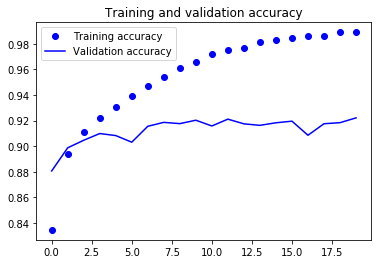

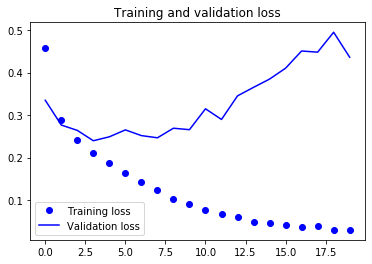

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

## Handling overfitting through droput

You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

So let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)         

In [ ]:
fashion_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 46s 949us/sample - loss: 0.6023 - accuracy: 0.7746 - val_loss: 0.3736 - val_accuracy: 0.8609
Epoch 2/20
48000/48000 [==============================] - 47s 971us/sample - loss: 0.3799 - accuracy: 0.8601 - val_loss: 0.3197 - val_accuracy: 0.8818
Epoch 3/20
48000/48000 [==============================] - 44s 922us/sample - loss: 0.3330 - accuracy: 0.8767 - val_loss: 0.2738 - val_accuracy: 0.8978
Epoch 4/20
48000/48000 [==============================] - 44s 916us/sample - loss: 0.3023 - accuracy: 0.8893 - val_loss: 0.2688 - val_accuracy: 0.9017
Epoch 5/20
48000/48000 [==============================] - 44s 919us/sample - loss: 0.2839 - accuracy: 0.8946 - val_loss: 0.2586 - val_accuracy: 0.9053
Epoch 6/20
48000/48000 [==============================] - 44s 919us/sample - loss: 0.2703 - accuracy: 0.8990 - val_loss: 0.2399 - val_accuracy: 0.9122
Epoch 7/20
48000/48000 [====================

Let's save the model so that you can directly load it and not have to train it again for 20 epochs. This way, you can load the model later on if you need it and modify the architecture; Alternatively, you can start the training process on this saved model. It is always a good idea to save the model -and even the model's weights!- because it saves you time. Note that you can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, you will not have to start the training from the beginning.

In [ ]:
fashion_model.save("fashion_model_dropout.h5py");

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


## Model evaluation on test set

Now, let's also evaluate your new model and see how it performs!

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.23411626928150653
Test accuracy: 0.9143


Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.

Now, let's plot the accuracy and loss plots between training and validation data for the one last time.

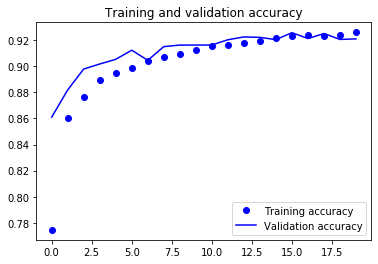

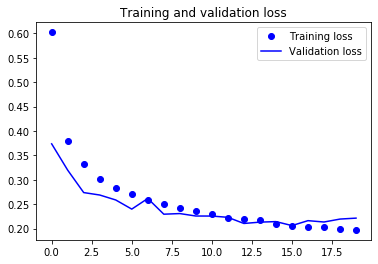

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

Therefore, you can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

## Prediction by the trained model

In [ ]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes.shape

(10000, 10)

Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use np.argmax() to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9100 correct labels


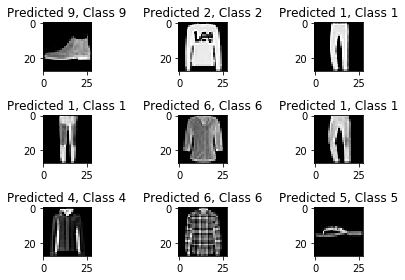

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 900 incorrect labels


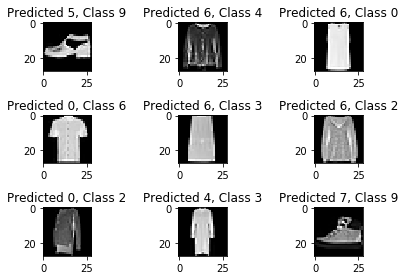

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

By looking at a few images, you cannot be sure as to why your model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture.

## Classification Report

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.83      0.80      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.80      0.86      1000
     Class 3       0.90      0.94      0.92      1000
     Class 4       0.88      0.86      0.87      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.76      0.78      0.77      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



You can see that the classifier is underperforming for class 6 regarding both precision and recall. For class 0, the classifier is lacking precision and recall is not above 90%. Also, for class 2, the classifier is slightly lacking recall.